# COVID-19 Analysis
<br>

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
data.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  125.000000  125.000000  125.000000  125.000000  125.000000  125.000000   
mean    32.160092   37.307430    4.440000    5.224000    7.528000   11.472000   
std     20.184693   85.561399   39.746657   39.840785   49.520373   68.835191   
min    -40.900600 -123.869500    0.000000    0.000000    0.000000    0.000000   
25%     26.078900    1.659600    0.000000    0.000000    0.000000    0.000000   
50%     35.443700   47.750000    0.000000    0.000000    0.000000    0.000000   
75%     43.653200  112.500000    0.000000    1.000000    2.000000    3.000000   
max     64.963100  174.886000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       2/21/20  \
count   125.000000   125.000000   125.000000   125.000000  ...    125.000000   
mean     16.944000    23.416000    44.624000    49.328000  ...    614.744000   
std      96.111268   129.438626   318.761506   320.358161  ...   5600.966184   
min       0.000000     0.000000     0.000000     0.000000  ...      0.000000   
25%       0.000000     0.000000     0.000000     0.000000  ...      0.000000   
50%       0.000000     0.000000     0.000000     0.000000  ...      2.000000   
75%       4.000000     6.000000     8.000000     8.000000  ...     75.000000   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  62662.000000   

            2/22/20       2/23/20       2/24/20      2/25/20       2/26/20  \
count    125.000000    125.000000    125.000000    125.00000    125.000000   
mean     628.792000    631.880000    636.560000    643.32000    651.176000   
std     5727.852962   5727.726592   5745.789407   5790.29246   5826.135337   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        0.000000      0.000000      0.000000      0.00000      1.000000   
50%        2.000000      2.000000      2.000000      2.00000      2.000000   
75%       75.000000     76.000000     79.000000     91.00000     91.000000   
max    64084.000000  64084.000000  64287.000000  64786.00000  65187.000000   

            2/27/20       2/28/20       2/29/20        3/1/20  
count    125.000000    125.000000    125.000000    125.000000  
mean     662.048000    672.976000    688.104000    706.968000  
std     5863.068799   5892.438301   5932.363864   5985.776481  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      1.000000      1.000000      1.000000  
50%        3.000000      4.000000      6.000000      7.000000  
75%       92.000000     93.000000     95.000000    106.000000  
max    65596.000000  65914.000000  66337.000000  66907.000000  

[8 rows x 42 columns]

In [3]:
data

Province/State      Country/Region      Lat      Long  1/22/20  1/23/20  \
0             Anhui      Mainland China  31.8257  117.2264        1        9   
1           Beijing      Mainland China  40.1824  116.4142       14       22   
2         Chongqing      Mainland China  30.0572  107.8740        6        9   
3            Fujian      Mainland China  26.0789  117.9874        1        5   
4             Gansu      Mainland China  36.0611  103.8343        0        2   
..              ...                 ...      ...       ...      ...      ...   
120             NaN          Azerbaijan  40.1431   47.5769        0        0   
121             NaN      Czech Republic  49.8175   15.4730        0        0   
122             NaN             Armenia  40.0691   45.0382        0        0   
123             NaN  Dominican Republic  18.7357  -70.1627        0        0   
124  Providence, RI                  US  41.8240  -71.4128        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  2/21/20  2/22/20  2/23/20  \
0         15       39       60       70  ...      988      989      989   
1         36       41       68       80  ...      396      399      399   
2         27       57       75      110  ...      572      573      575   
3         10       18       35       59  ...      293      293      293   
4          2        4        7       14  ...       91       91       91   
..       ...      ...      ...      ...  ...      ...      ...      ...   
120        0        0        0        0  ...        0        0        0   
121        0        0        0        0  ...        0        0        0   
122        0        0        0        0  ...        0        0        0   
123        0        0        0        0  ...        0        0        0   
124        0        0        0        0  ...        0        0        0   

     2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  
0        989      989      989      989      990      990     990  
1        399      400      400      410      410      411     413  
2        576      576      576      576      576      576     576  
3        293      294      294      296      296      296     296  
4         91       91       91       91       91       91      91  
..       ...      ...      ...      ...      ...      ...     ...  
120        0        0        0        0        0        0       3  
121        0        0        0        0        0        0       3  
122        0        0        0        0        0        0       1  
123        0        0        0        0        0        0       1  
124        0        0        0        0        0        0       1  

[125 rows x 44 columns]

In [4]:
data_italy = data[data["Country/Region"] == "Italy"]
#data_italy.values[0,[3]]
#type(data_italy.values)
values =[]
for i in range(4,len(data_italy.values[0])):
    values += [data_italy.values[0][i]]
    
values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 20,
 62,
 155,
 229,
 322,
 453,
 655,
 888,
 1128,
 1694]

In [5]:
dates = []
for x in data_italy:
    dates+= [x]
    
dates = dates[4:]
dates

df = pd.DataFrame( {
    'dates': dates,
    'values' : values,                 
    'el': [i for i in range(1,len(values)+1)]       
                   })

In [6]:
df.head()

dates  values  el
0  1/22/20       0   1
1  1/23/20       0   2
2  1/24/20       0   3
3  1/25/20       0   4
4  1/26/20       0   5

In [7]:
import plotly.express as px
fig = px.scatter(df,x = "el",y="values", trendline="ols", color="values")
fig.show()

In [8]:
import plotly.express as px
fig = px.line(df,x = "dates", y="values")
fig.show()

## LINEAR REGRESSION with Sklearn

In [9]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


#rescaling the values to get a better accuracy
df["el"]

j = 1
for i in range(len(df["el"])):
    if(i >= 20):
        df["el"][i]=j
        j+=1
        
X = df.iloc[20:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[20:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
acc = linear_regressor.score(X, Y)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print("Accuracy:" ,acc)


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 640x480 with 1 Axes>

Accuracy: 0.6278428150820454


# EVALUATION IN CHINA

In [10]:
data_china = data[data["Country/Region"] == "Mainland China"]
data_china

Province/State  Country/Region       Lat      Long  1/22/20  1/23/20  \
0            Anhui  Mainland China  31.82570  117.2264        1        9   
1          Beijing  Mainland China  40.18240  116.4142       14       22   
2        Chongqing  Mainland China  30.05720  107.8740        6        9   
3           Fujian  Mainland China  26.07890  117.9874        1        5   
4            Gansu  Mainland China  36.06110  103.8343        0        2   
5        Guangdong  Mainland China  23.34170  113.4244       26       32   
6          Guangxi  Mainland China  23.82980  108.7881        2        5   
7          Guizhou  Mainland China  26.81540  106.8748        1        3   
8           Hainan  Mainland China  19.19590  109.7453        4        5   
9            Hebei  Mainland China  38.04280  114.5149        1        1   
10    Heilongjiang  Mainland China  47.86200  127.7615        0        2   
11           Henan  Mainland China  33.88202  113.6140        5        5   
12           Hubei  Mainland China  30.97560  112.2707      444      444   
13           Hunan  Mainland China  27.61040  111.7088        4        9   
14  Inner Mongolia  Mainland China  44.09350  113.9448        0        0   
15         Jiangsu  Mainland China  32.97110  119.4550        1        5   
16         Jiangxi  Mainland China  27.61400  115.7221        2        7   
17           Jilin  Mainland China  43.66610  126.1923        0        1   
18        Liaoning  Mainland China  41.29560  122.6085        2        3   
19         Ningxia  Mainland China  37.26920  106.1655        1        1   
20         Qinghai  Mainland China  35.74520   95.9956        0        0   
21         Shaanxi  Mainland China  35.19170  108.8701        0        3   
22        Shandong  Mainland China  36.34270  118.1498        2        6   
23        Shanghai  Mainland China  31.20200  121.4491        9       16   
24          Shanxi  Mainland China  37.57770  112.2922        1        1   
25         Sichuan  Mainland China  30.61710  102.7103        5        8   
26         Tianjin  Mainland China  39.30540  117.3230        4        4   
27           Tibet  Mainland China  31.69270   88.0924        0        0   
28        Xinjiang  Mainland China  41.11290   85.2401        0        2   
29          Yunnan  Mainland China  24.97400  101.4870        1        2   
30        Zhejiang  Mainland China  29.18320  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  2/21/20  2/22/20  2/23/20  \
0        15       39       60       70  ...      988      989      989   
1        36       41       68       80  ...      396      399      399   
2        27       57       75      110  ...      572      573      575   
3        10       18       35       59  ...      293      293      293   
4         2        4        7       14  ...       91       91       91   
5        53       78      111      151  ...     1333     1339     1342   
6        23       23       36       46  ...      246      249      249   
7         3        4        5        7  ...      146      146      146   
8         8       19       22       33  ...      168      168      168   
9         2        8       13       18  ...      308      309      311   
10        4        9       15       21  ...      479      479      480   
11        9       32       83      128  ...     1267     1270     1271   
12      549      761     1058     1423  ...    62662    64084    64084   
13       24       43       69      100  ...     1011     1013     1016   
14        1        7        7       11  ...       75       75       75   
15        9       18       33       47  ...      631      631      631   
16       18       18       36       72  ...      934      934      934   
17        3        4        4        6  ...       91       91       91   
18        4       17       21       27  ...      121      121      121   
19        2        3        4        7  ...       71       71       71   
20        0      

In [11]:
#data_italy.values[0,[3]]
#type(data_italy.values)
df = {}
for i in range(len(data_china.values)):
    for j in range(4, len(data_china.values[i])):
        df["values"] = [data_china.values[i][j],data_china.values[i]]
pd.DataFrame(df)["values"]

0                                                 1205
1    [Zhejiang, Mainland China, 29.1832, 120.0934, ...
Name: values, dtype: object

In [12]:
data_china.values[1][2]

40.1824

In [13]:
china_cities = []
count = 1
ind = []
for i in range(len(data_china.values)):
    count = 0
    for j in range(len(data_china.values[i][4:])):
                       china_cities+= [data_china.values[i][0]]
                       ind += [count]
                       count += 1

In [14]:
china_values=[]
for i in range(len(data_china.values)):
    for j in range(4,len(data_china.values[i])):      
        china_values+= [data_china.values[i][j]]
             

In [15]:
df_china = pd.DataFrame(list(zip(china_values, china_cities,ind)), 
               columns =['Values', 'Cities','Lags']) 

In [16]:
df_china

Values    Cities  Lags
0          1     Anhui     0
1          9     Anhui     1
2         15     Anhui     2
3         39     Anhui     3
4         60     Anhui     4
...      ...       ...   ...
1235    1205  Zhejiang    35
1236    1205  Zhejiang    36
1237    1205  Zhejiang    37
1238    1205  Zhejiang    38
1239    1205  Zhejiang    39

[1240 rows x 3 columns]

In [17]:
import plotly.express as px
fig = px.line(df_china, x="Lags", y = "Values", color="Cities")
fig.show()

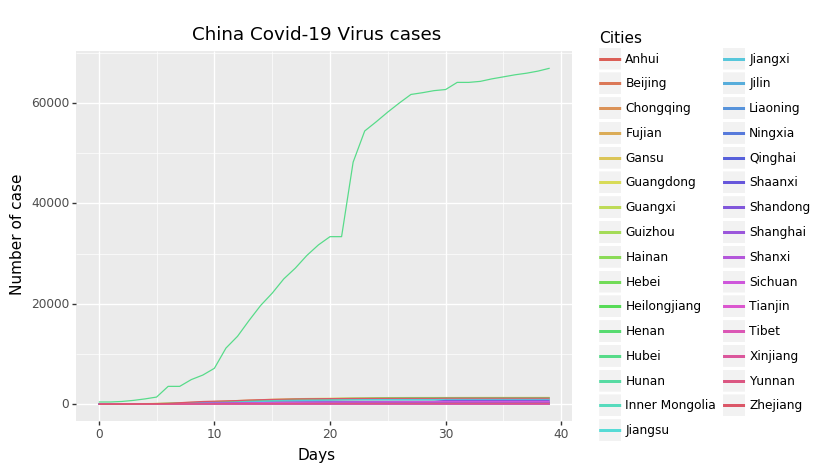

<ggplot: (-9223371897234348628)>

In [18]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
(ggplot(df_china)
 + aes(x='Lags', y='Values', color='Cities')
 + geom_line()
 + labs(title='China Covid-19 Virus cases', x='Days', y='Number of case')
)

In [19]:
import plotly.express as px
fig = px.scatter(df_china, x="Lags", y = "Values", color="Cities",  trendline="ols")
fig.show()

## Hubei Linear regression

In [20]:
from sklearn.linear_model import LinearRegression
df_hubei = df_china[df_china["Cities"] == "Hubei"]
df_hubei = df_hubei.drop(["Cities"],axis=1) 

fig = px.scatter(df_hubei, x="Lags", y = "Values", trendline="ols")
fig.show()

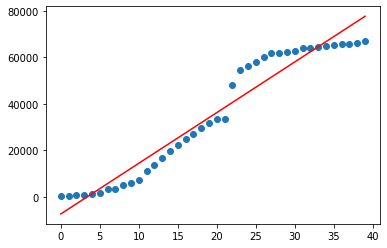

Accuracy: 0.9431456103160005


In [21]:
X = df_hubei.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_hubei.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
acc = linear_regressor.score(X, Y)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print("Accuracy:" ,acc)

In [111]:

predictions = linear_regressor.predict(X)

array([[-7375.64146341],
       [-5194.86754221],
       [-3014.09362101],
       [ -833.31969981],
       [ 1347.45422139],
       [ 3528.22814259],
       [ 5709.00206379],
       [ 7889.77598499],
       [10070.54990619],
       [12251.32382739],
       [14432.09774859],
       [16612.87166979],
       [18793.64559099],
       [20974.4195122 ],
       [23155.1934334 ],
       [25335.9673546 ],
       [27516.7412758 ],
       [29697.515197  ],
       [31878.2891182 ],
       [34059.0630394 ],
       [36239.8369606 ],
       [38420.6108818 ],
       [40601.384803  ],
       [42782.1587242 ],
       [44962.9326454 ],
       [47143.7065666 ],
       [49324.4804878 ],
       [51505.25440901],
       [53686.02833021],
       [55866.80225141],
       [58047.57617261],
       [60228.35009381],
       [62409.12401501],
       [64589.89793621],
       [66770.67185741],
       [68951.44577861],
       [71132.21969981],
       [73312.99362101],
       [75493.76754221],
       [77674.54146341]])

In [23]:
for x in range(len(predictions)):
    print("Prediction: ",predictions[x],"- Day:", X[x],"- Actual: ", Y[x])

Prediction:  [-7375.64146341] - Day: [0] - Actual:  [444]
Prediction:  [-5194.86754221] - Day: [1] - Actual:  [444]
Prediction:  [-3014.09362101] - Day: [2] - Actual:  [549]
Prediction:  [-833.31969981] - Day: [3] - Actual:  [761]
Prediction:  [1347.45422139] - Day: [4] - Actual:  [1058]
Prediction:  [3528.22814259] - Day: [5] - Actual:  [1423]
Prediction:  [5709.00206379] - Day: [6] - Actual:  [3554]
Prediction:  [7889.77598499] - Day: [7] - Actual:  [3554]
Prediction:  [10070.54990619] - Day: [8] - Actual:  [4903]
Prediction:  [12251.32382739] - Day: [9] - Actual:  [5806]
Prediction:  [14432.09774859] - Day: [10] - Actual:  [7153]
Prediction:  [16612.87166979] - Day: [11] - Actual:  [11177]
Prediction:  [18793.64559099] - Day: [12] - Actual:  [13522]
Prediction:  [20974.4195122] - Day: [13] - Actual:  [16678]
Prediction:  [23155.1934334] - Day: [14] - Actual:  [19665]
Prediction:  [25335.9673546] - Day: [15] - Actual:  [22112]
Prediction:  [27516.7412758] - Day: [16] - Actual:  [2495

### Prediction for 01/03/2020, 02/03/2020, 03/03/2020

In [24]:
prediction  = linear_regressor.predict([[39],[40],[41]])
l = 39
for x in prediction:
    print("Giorno ",l,": ",x[0])
    l+=1

Giorno  39 :  77674.54146341463
Giorno  40 :  79855.31538461539
Giorno  41 :  82036.08930581613


# Logistic regression

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



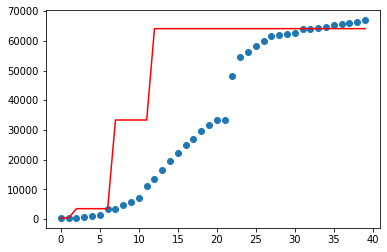

Accuracy: 0.125


In [25]:
from sklearn.linear_model import LogisticRegression


X = df_hubei.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_hubei.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
logistic = LogisticRegression(random_state=0)  # create object for the class
logistic.fit(X, Y)  # perform linear regression
acc = logistic.score(X, Y)
Y_pred = logistic.predict(X)  # make predictions


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print("Accuracy:" ,acc)

#plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)


In [26]:
Y_pred = logistic.predict([[41]])
Y_pred 

array([64084], dtype=int64)

In [43]:
prob = logistic.predict_proba(X)
from sklearn import linear_model
from scipy.special import expit
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, Y)
acc = clf.score(X, Y)

print("Accuracy:" ,acc)

Accuracy: 0.25


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.





# Random Forest regression

In [217]:
X = df_hubei.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_hubei.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

In [237]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=42)
regressor.fit(X,Y)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [238]:
predictions = regressor.predict(X)
for x in range(len(predictions)):
    print("Prediction: ",predictions[x],"- Day:", X[x],"- Actual: ", Y[x])
    
acc = regressor.score(X,Y)
print("\nAccuracy of : ",acc)

Prediction:  475.7 - Day: [0] - Actual:  [444]
Prediction:  475.7 - Day: [1] - Actual:  [444]
Prediction:  549.2 - Day: [2] - Actual:  [549]
Prediction:  769.5 - Day: [3] - Actual:  [761]
Prediction:  939.2 - Day: [4] - Actual:  [1058]
Prediction:  1247.3 - Day: [5] - Actual:  [1423]
Prediction:  3091.3 - Day: [6] - Actual:  [3554]
Prediction:  3304.4 - Day: [7] - Actual:  [3554]
Prediction:  4948.5 - Day: [8] - Actual:  [4903]
Prediction:  5894.8 - Day: [9] - Actual:  [5806]
Prediction:  6883.6 - Day: [10] - Actual:  [7153]
Prediction:  9969.8 - Day: [11] - Actual:  [11177]
Prediction:  13287.5 - Day: [12] - Actual:  [13522]
Prediction:  14865.5 - Day: [13] - Actual:  [16678]
Prediction:  19841.1 - Day: [14] - Actual:  [19665]
Prediction:  21946.1 - Day: [15] - Actual:  [22112]
Prediction:  24315.4 - Day: [16] - Actual:  [24953]
Prediction:  26709.0 - Day: [17] - Actual:  [27100]
Prediction:  28910.1 - Day: [18] - Actual:  [29631]
Prediction:  31262.7 - Day: [19] - Actual:  [31728]
Pr

In [239]:
#plt.scatter(X, Y)
#plt.plot(X, Y, color="red")
newY=[]
newX=[]


    
for i in range(len(Y)):
    newY+=[Y[i][0]]

for i in range(len(X)):
    newX+=[X[i][0]]
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
   x=newX,
   y=newY,
   name="Actual Cases"       # this sets its legend entry
))

fig.add_trace(go.Scatter(
    x=newX,
    y=predictions,
    name="Predicted"       # this sets its legend entry
))

fig.update_layout(
    title="Forecast of cases using RF",
    xaxis_title="Day",
    yaxis_title="Values",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

acc = regressor.score(X,Y)
print("\nAccuracy of : ",acc)



Accuracy of :  0.9995179670300028


In [240]:
predictions

array([  475.7,   475.7,   549.2,   769.5,   939.2,  1247.3,  3091.3,
        3304.4,  4948.5,  5894.8,  6883.6,  9969.8, 13287.5, 14865.5,
       19841.1, 21946.1, 24315.4, 26709. , 28910.1, 31262.7, 32664.9,
       35306.2, 47282.3, 53970.3, 55880.4, 57782.8, 59977.6, 61004.8,
       61897.6, 62270.9, 62902.4, 63799.6, 64084. , 64205.8, 64656.1,
       65228.7, 65351.4, 65917.9, 66366.4, 66636.7])

In [1]:
# Import tools needed for visualization

#feature_list = list(df_hubei.columns[0])
#from sklearn.tree import export_graphviz
#import pydot
#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf_small.fit(train_features, train_labels)# Extract the small tree
#tree_small = rf_small.estimators_[5]# Save the tree as a png image
#export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = ["Values"], rounded = True, precision = 1)

#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png');